In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [13]:
tesla = pd.read_csv('Tesla_Stock.csv', index_col = 'Date')

tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [14]:
ford = pd.read_csv('Ford_Stock.csv', index_col = 'Date')

ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [15]:
gm = pd.read_csv('GM_Stock.csv', index_col = 'Date')

gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


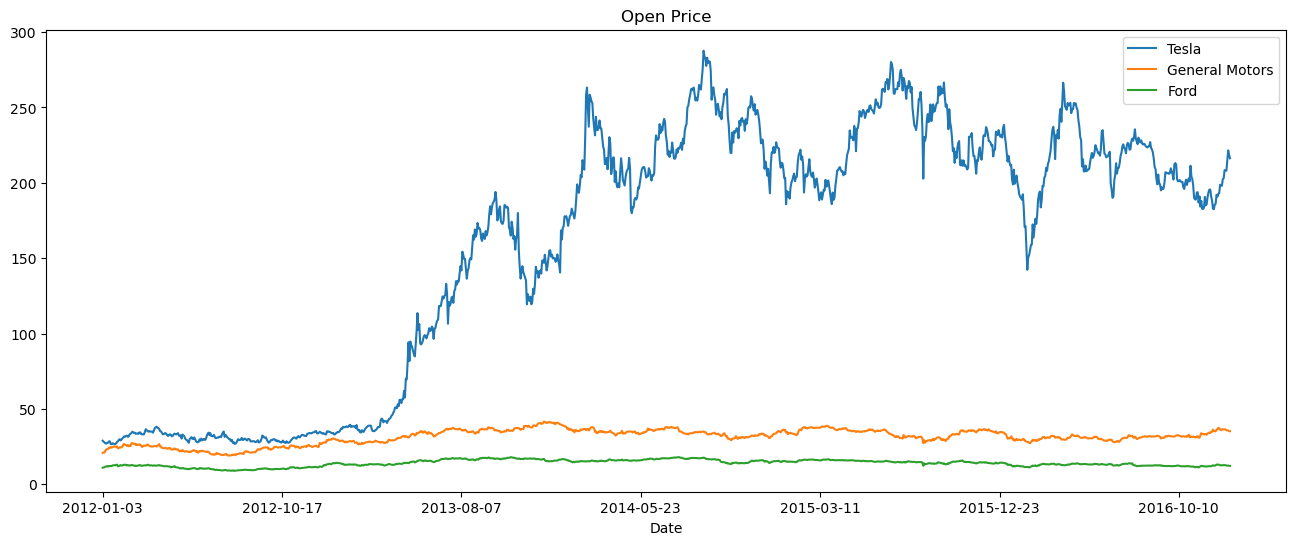

In [31]:
#Open prices comp

tesla['Open'].plot(label= 'Tesla',figsize = (16,6), title='Open Price')
gm['Open'].plot(label='General Motors')
ford['Open'].plot(label='Ford')
plt.legend()
plt.show()

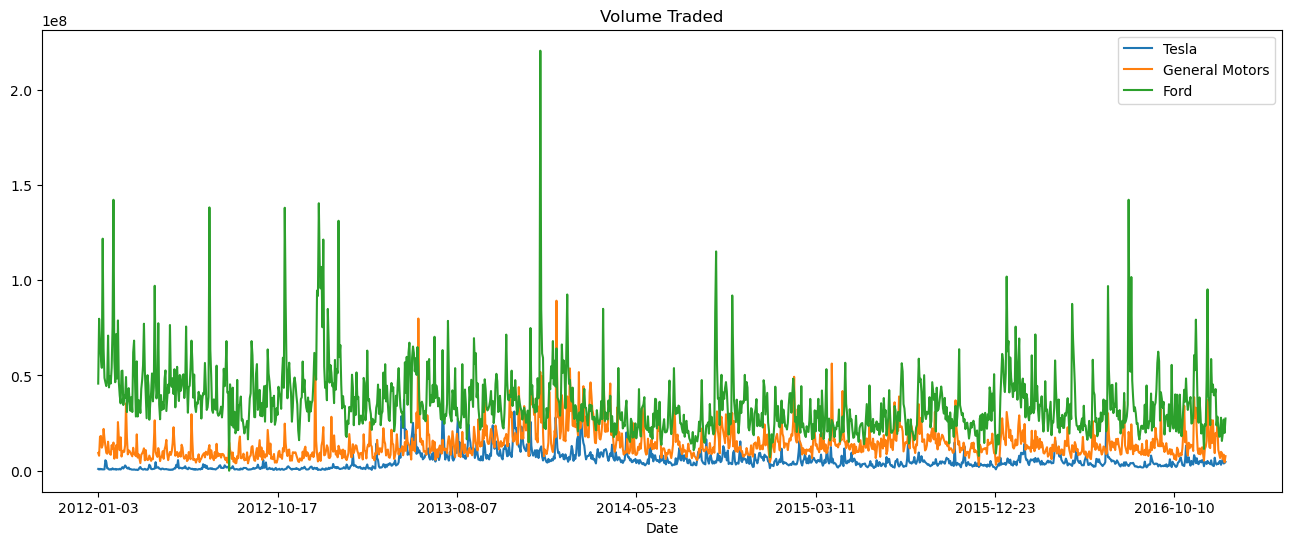

In [33]:
#Volume trader comp

tesla['Volume'].plot(label= 'Tesla',figsize = (16,6), title='Volume Traded')
gm['Volume'].plot(label='General Motors')
ford['Volume'].plot(label='Ford')
plt.legend()
plt.show()

In [37]:
#new colomns total trader = open price * volume traded

tesla['Total Traded'] = tesla['Open']*tesla['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']

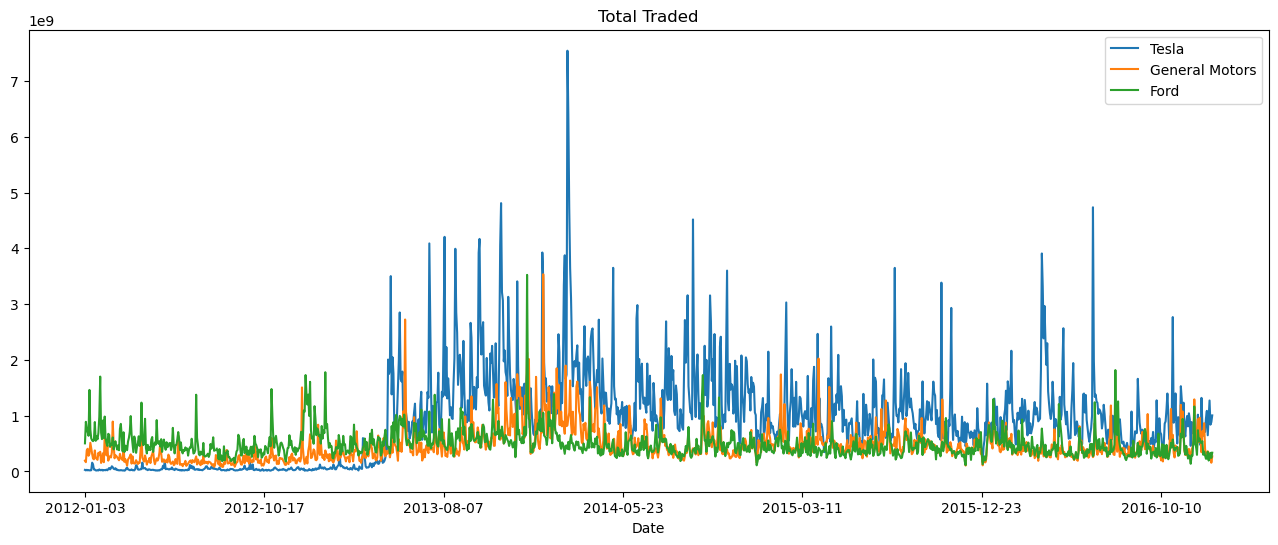

In [49]:
#Plot total traded

tesla['Total Traded'].plot(label='Tesla', figsize=(16,6), title='Total Traded')
gm['Total Traded'].plot(label='General Motors')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.show()

In [50]:
tesla['Total Traded'].argmax()

np.int64(538)

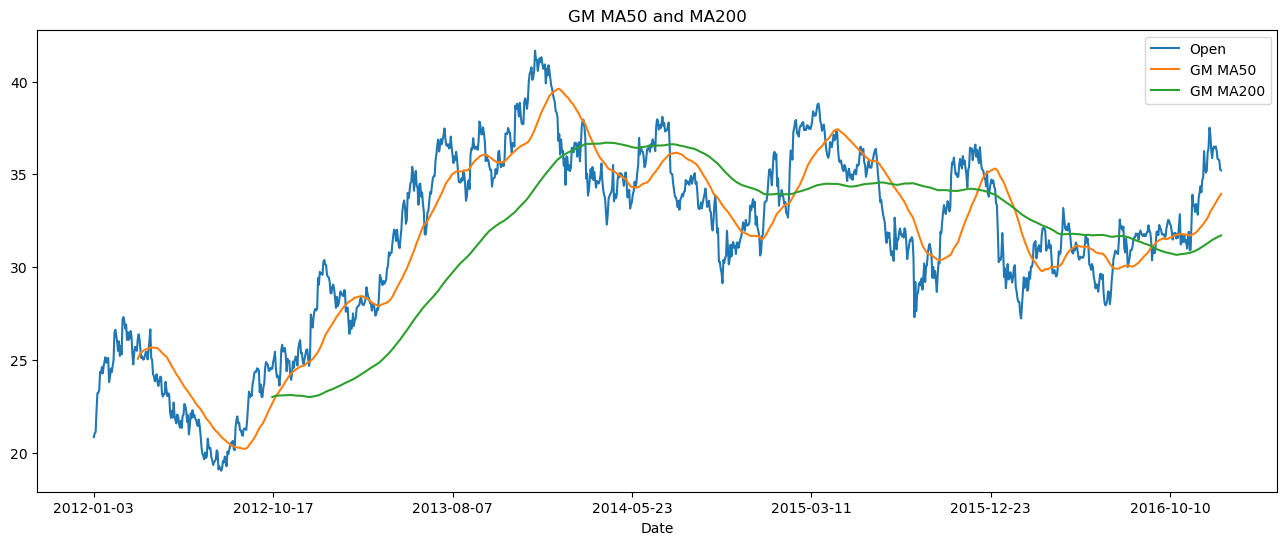

In [59]:
#plot the moving average 50 and 200 for GM : MA50, MA200

gm['GM MA50']= gm['Open'].rolling(50).mean()
gm['GM MA200']= gm['Open'].rolling(200).mean()
gm[['Open', 'GM MA50', 'GM MA200']].plot(figsize=(16,6), title='GM MA50 and MA200')

plt.legend()
plt.show()

In [62]:
#See if there is a relation between them

from pandas.plotting import scatter_matrix

In [88]:
car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)
car_comp.head()

,Open,Open,Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


In [89]:
car_comp.columns=['Tesla open', 'GM open', 'ford open']

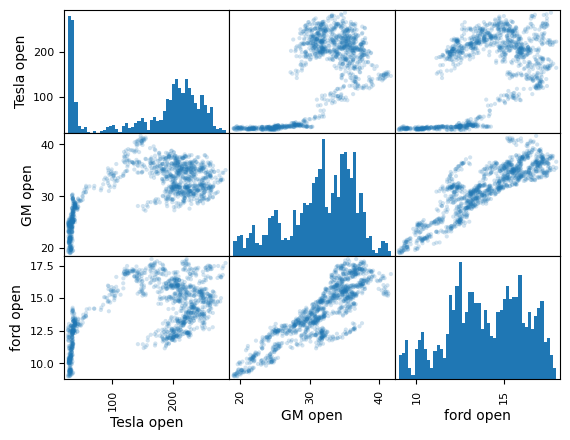

In [93]:
scatter_matrix(car_comp, alpha=0.2, hist_kwds={'bins':50} )

plt.show()

In [96]:
#Part3 : Basic Financial Analysis

# Daily percentage Rate : Rt = Pt/p(t-1) -1

#Create a new column for each ds called return

tesla['Returns'] = tesla['Close']/tesla['Close'].shift(1) -1
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,Return,Returns
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,-0.868595,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.870326,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.873087,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.874164,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,-0.872479,0.013388


In [103]:
gm['Returns'] = gm['Close']/gm['Close'].shift(1) -1
ford['Returns'] = ford['Close']/ford['Close'].shift(1) -1

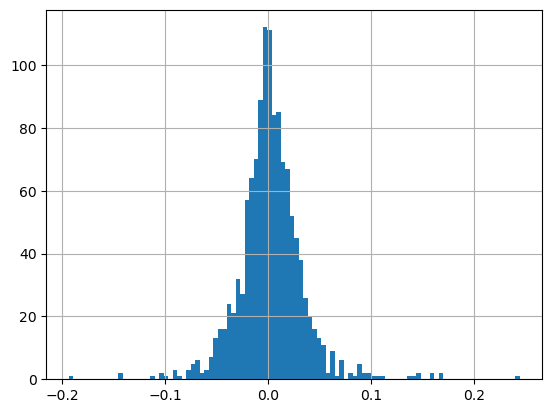

In [104]:
tesla['Returns'].hist(bins=100)
plt.show()

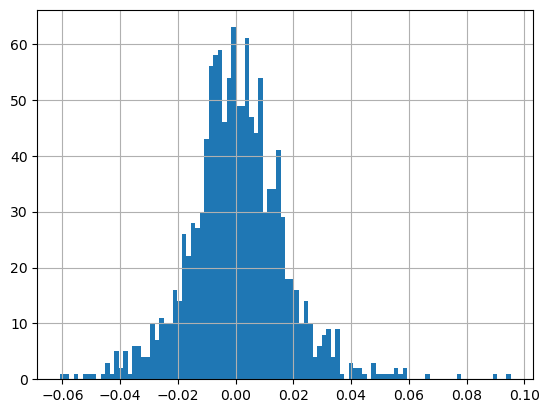

In [105]:
gm['Returns'].hist(bins=100)
plt.show()

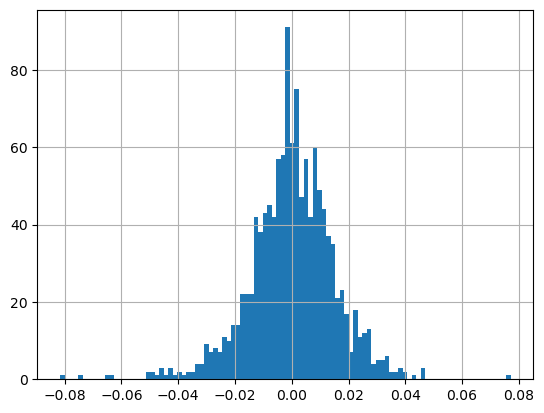

In [106]:
ford['Returns'].hist(bins=100)
plt.show()

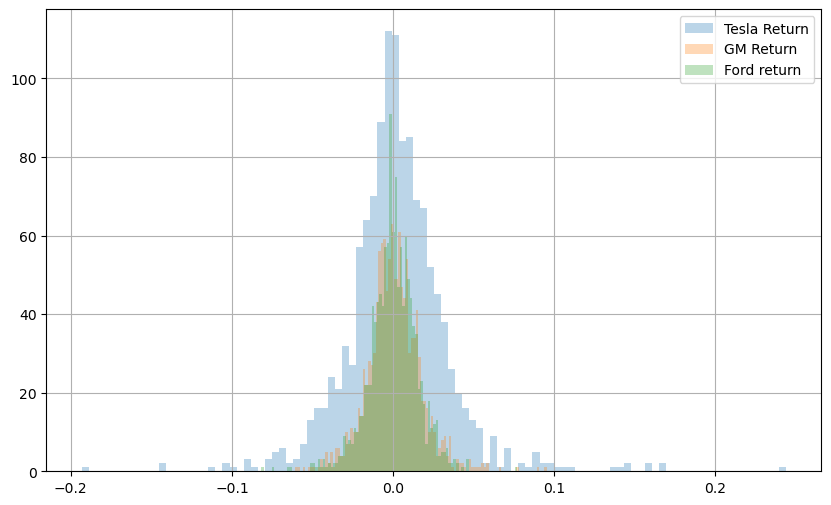

In [130]:
# all 3 on the same hist

tesla['Returns'].hist(bins=100, label = 'Tesla Return', figsize=(10,6), alpha=0.3)
gm['Returns'].hist(bins=100,label='GM Return', alpha=0.3)
ford['Returns'].hist(bins=100,label='Ford return', alpha =0.3)

plt.legend()
plt.show()

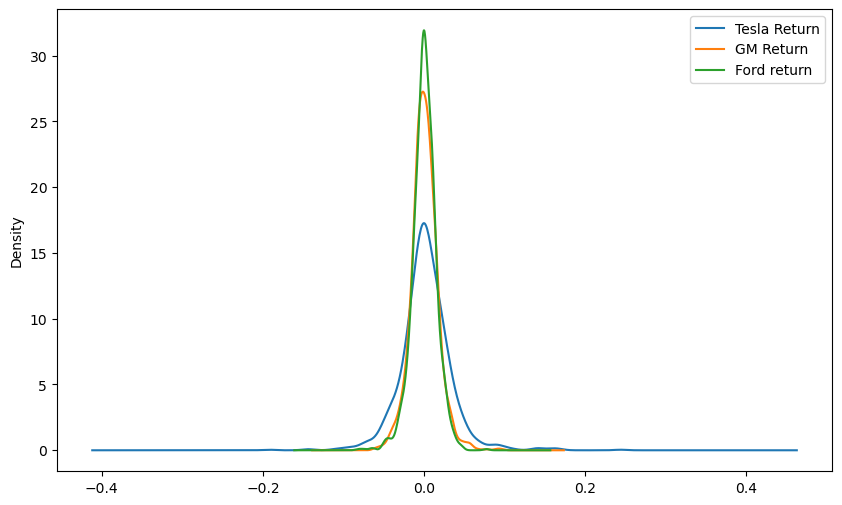

In [134]:
# all 3 on the same kde

tesla['Returns'].plot(kind='kde',label = 'Tesla Return', figsize=(10,6))
gm['Returns'].plot(kind='kde',label='GM Return')
ford['Returns'].plot(kind='kde',label='Ford return')

plt.legend()
plt.show()

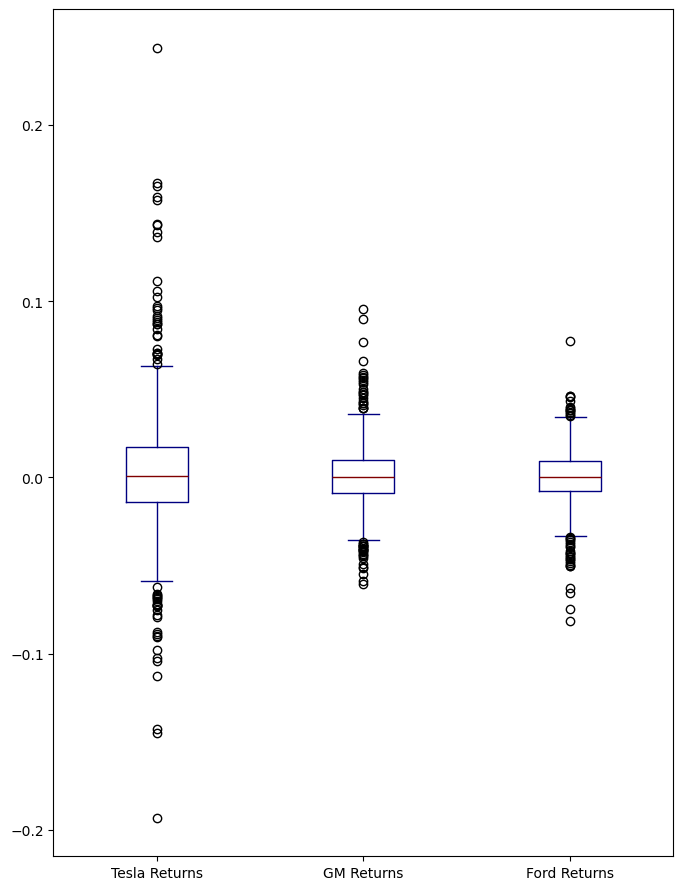

In [144]:
box_df = pd.concat([tesla['Returns'],gm['Returns'],ford['Returns']],axis=1)
box_df.columns = ['Tesla Returns','GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

plt.show()

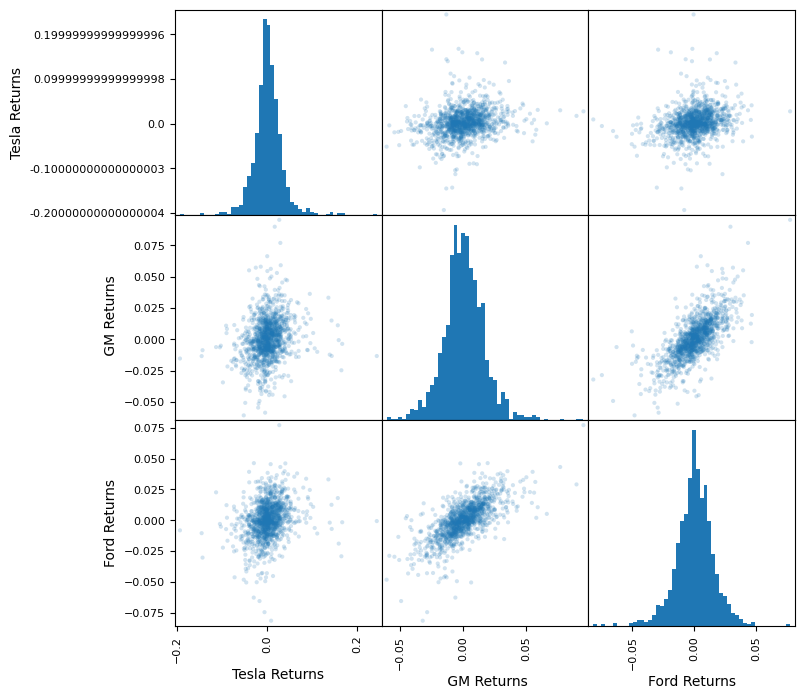

In [139]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})

plt.show()

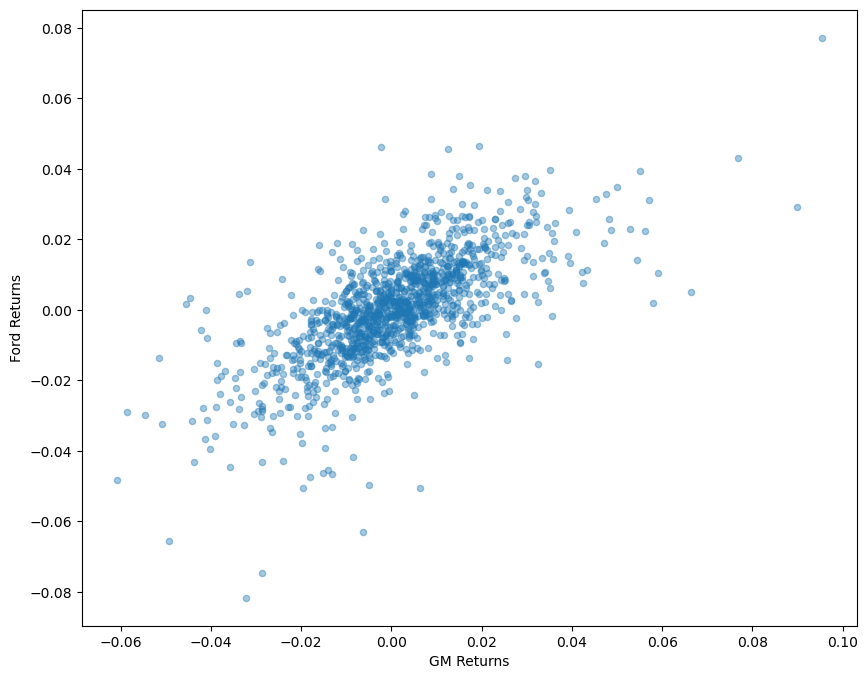

In [145]:
box_df.plot(kind='scatter', x='GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

plt.show()

In [147]:
#Cumulative Daily return

tesla['Daily_cumulative_return']= (1+ tesla['Returns']).cumprod()
gm['Daily_cumulative_return']= (1+ gm['Returns']).cumprod()
ford['Daily_cumulative_return']= (1+ ford['Returns']).cumprod()

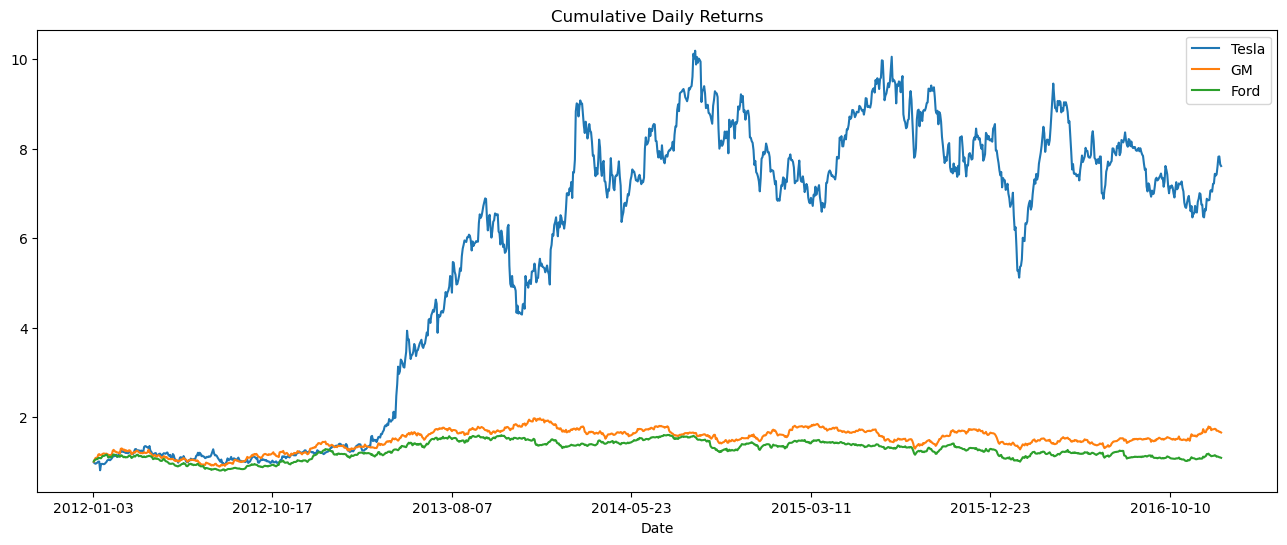

In [148]:
tesla['Daily_cumulative_return'].plot(label='Tesla', title='Cumulative Daily Returns', figsize=(16,6))
gm['Daily_cumulative_return'].plot(label='GM')
ford['Daily_cumulative_return'].plot(label='Ford')

plt.legend()
plt.show()

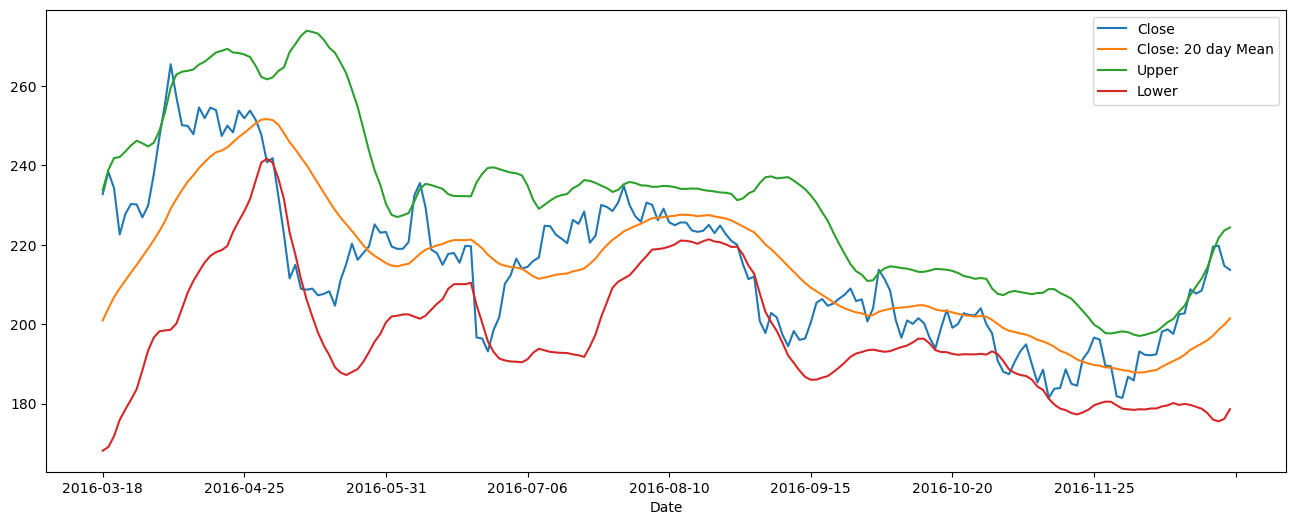

In [154]:
#BONUS Bollinger Band de Tesla : 

# Bollinger Band : deux bandes qui reflete de la vol autour de la bande moyenne. Quand ST > BolB
# le prix est trop haut. quand ST < BolB le prix est trop bas.

# Close 20 MA
tesla['Close: 20 day Mean'] = tesla['Close'].rolling(20).mean()

# Upper = 20MA + 2*std(20) avec std : ecart type
tesla['Upper'] = tesla['Close: 20 day Mean'] + 2*(tesla['Close'].rolling(20).std())

# Lower = 20MA - 2*std(20)
tesla['Lower'] = tesla['Close: 20 day Mean'] - 2*(tesla['Close'].rolling(20).std())

#Close des 200 derniers jours : ajouter tail(200) avant plot
tesla[['Close', 'Close: 20 day Mean', 'Upper', 'Lower']].tail(200).plot(figsize=(16,6))

plt.show()